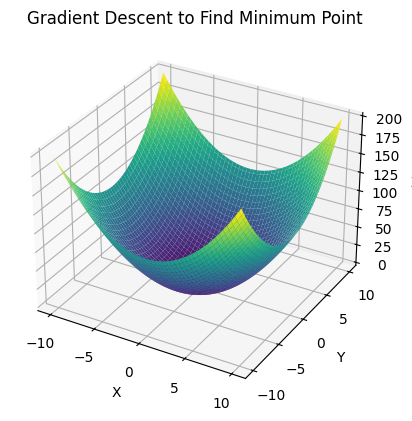

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scratch.linear_algebra import sum_of_squares, Vector


# Create a grid of values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([sum_of_squares([x, y])
             for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gradient Descent to Find Minimum Point')

plt.show()

In [2]:
from typing import Callable, List


def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    """
    Calculate the difference quotient of a function at a given point.
    This function calculates the difference quotient of a function `f` at a given
    point `x`. The difference quotient is an approximation of the derivative of
    the function at that point.
    Parameters:
    -----------
    f : Callable[[float], float]
        The function for which to calculate the difference quotient.
    x : float
        The point at which to calculate the difference quotient.
    h : float
        The small value by which to perturb `x`.
    Returns:
    --------
    float:
        The difference quotient of the function at the given point.
    """
    return (f(x + h) - f(x)) / h

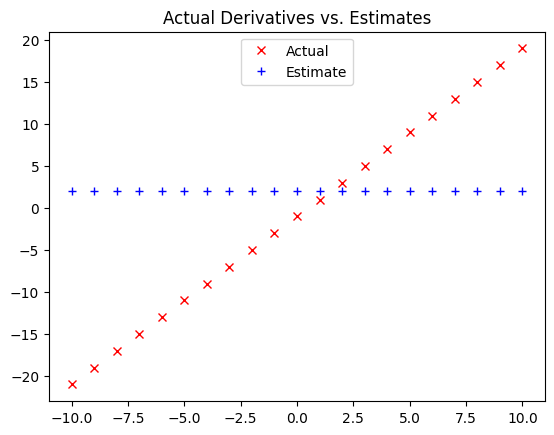

In [3]:
xs = range(-10, 11)
actuals = [2 * x - 1 for x in xs]
estimateds = [difference_quotient(lambda x: 2 * x - 1, x, h=0.001) for x in xs]

# plot to show they're basically the same
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimateds, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [4]:
def partial_difference_quotient(f: Callable[[float], float], v: List[float], i: int, h: float) -> float:
    """
    Calculate the partial difference quotient of a function at a given point.
    This function calculates the partial difference quotient of a function `f` at a given
    point `v`. The partial difference quotient is an approximation of the partial derivative
    of the function at that point with respect to the `i`-th variable.
    Parameters:
    -----------
    f : Callable[[List[float]], float]
        The function for which to calculate the partial difference quotient.
    v : List[float]
        The point at which to calculate the partial difference quotient.
    i : int
        The index of the variable with respect to which to calculate the partial derivative.
    h : float
        The small value by which to perturb the `i`-th variable.
    Returns:
    --------
    float:
        The partial difference quotient of the function at the given point.
    """
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [5]:
def estimate_gradient(f: Callable[[List[float]], float], v: List[float], h: float = 0.00001) -> List[float]:
    """
    Estimate the gradient of a function at a given point.
    This function estimates the gradient of a function `f` at a given point `v`. The gradient
    is a vector of partial derivatives of the function at that point.
    Parameters:
    -----------
    f : Callable[[List[float]], float]
        The function for which to calculate the gradient.
    v : List[float]
        The point at which to calculate the gradient.
    h : float
        The small value by which to perturb the variables.
    Returns:
    --------
    List[float]:
        The gradient of the function at the given point.
    """
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

In [6]:
import random
from scratch.linear_algebra import distance, add, scalar_multiply


def gradient_step(v: List[float], gradient: List[float], step_size: float) -> List[float]:
    """
    Take a step in the direction of the gradient.
    This function takes a step in the direction of the gradient of a function `f` at a given
    point `v`. The step size is determined by the `step_size` parameter.
    Parameters:
    -----------
    v : List[float]
        The point at which to take a step.
    gradient : List[float]
        The gradient of the function at the given point.
    step_size : float
        The size of the step to take.
    Returns:
    --------
    List[float]:
        The new point after taking a step in the direction of the gradient.
    """
    step = scalar_multiply(step_size, gradient)
    return add(v, step)


def sum_of_squares_gradient(v: List[float]) -> List[float]:
    """
    Calculate the gradient of the sum of squares function.
    This function calculates the gradient of the sum of squares function at a given point `v`.
    The sum of squares function is a simple quadratic function that has a minimum at the origin.
    Parameters:
    -----------
    v : List[float]
        The point at which to calculate the gradient.
    Returns:
    --------
    List[float]:
        The gradient of the sum of squares function at the given point.
    """
    return [2 * v_i for v_i in v]

In [7]:
# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]
print('v value:', v)

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)  # compute the gradient at v
    v = gradient_step(v, grad, -0.01)  # take a negative gradient step

    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001  # v should be close to 0

v value: [-6.722048143943569, -4.679503667202307, -8.537370400670072]
0 [-6.587607181064698, -4.585913593858261, -8.366622992656671]
1 [-6.455855037443404, -4.4941953219810955, -8.199290532803538]
2 [-6.326737936694536, -4.404311415541474, -8.035304722147467]
3 [-6.2002031779606455, -4.3162251872306445, -7.8745986277045175]
4 [-6.076199114401432, -4.229900683486032, -7.7171066551504275]
5 [-5.954675132113404, -4.145302669816312, -7.562764522047419]
6 [-5.835581629471136, -4.062396616419986, -7.411509231606471]
7 [-5.718869996881713, -3.981148684091586, -7.263279046974342]
8 [-5.604492596944079, -3.9015257104097545, -7.118013466034855]
9 [-5.492402745005197, -3.8234951962015593, -6.975653196714157]
10 [-5.382554690105094, -3.7470252922775282, -6.8361401327798745]
11 [-5.274903596302992, -3.6720847864319777, -6.699417330124277]
12 [-5.169405524376932, -3.598643090703338, -6.565428983521791]
13 [-5.066017413889393, -3.5266702288892713, -6.434120403851355]
14 [-4.964697065611605, -3.456136

In [8]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    """
    Calculate the gradient of the linear regression model.
    This function calculates the gradient of the linear regression model at a given point `(x, y)`.
    The linear regression model is parameterized by the vector `theta`.
    Parameters:
    -----------
    x : float
        The input feature.
    y : float
        The observed output.
    theta : List[float]
        The parameters of the linear regression model.
    Returns:
    --------
    List[float]:
        The gradient of the linear regression model at the given point.
    """
    slope, intercept = theta
    predicted = slope * x + intercept
    error = predicted - y
    # squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

In [17]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In [18]:
from scratch.linear_algebra import vector_mean

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.869502643970186, 0.910772983489718]
1 [10.744952509455374, 0.9328209401667088]
2 [26.169049497133436, 0.9317002507958307]
3 [15.881175685662795, 0.9460058997913725]
4 [22.743201823562707, 0.9499950636774526]
5 [18.16623437874735, 0.9608382753736604]
6 [21.21908250765089, 0.9670828332016604]
7 [19.182839050230058, 0.976367750042908]
8 [20.541022721246595, 0.9835978535930523]
9 [19.635121442782115, 0.9921716806071128]
10 [20.239366169344937, 0.9998224586886807]
11 [19.836342587505616, 1.0080621799406484]
12 [20.105167556313695, 1.0158823981682727]
13 [19.925869122336934, 1.02395580092825]
14 [20.045469251202192, 1.0318337584487303]
15 [19.965703843206587, 1.039815560183035]
16 [20.018915352141388, 1.0477016329058755]
17 [19.9834311617546, 1.0556251449922052]
18 [20.007107040254674, 1.0634973258639755]
19 [19.991323101475995, 1.0713774382525023]
20 [20.001858868753764, 1.0792260064774732]
21 [19.994839360547715, 1.0870694133332721]
22 [19.999529215928007, 1.0948901138671532]
23 [19.

In [ ]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions


def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Gererate `batch_size`-sized minibatches from the dataset"""
    # start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle:
        random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [ ]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"

0 [18.589640041021546, 0.9955899996196976]
1 [18.086099845814587, 1.1549184686269018]
2 [19.987741648550916, 1.5799430854189425]
3 [20.215122170088392, 1.607671459888801]
4 [20.697823800191316, 1.635836450045735]
5 [19.861950805374637, 1.65355102970426]
6 [20.082405804403297, 1.6898691140132749]
7 [19.965178407605876, 1.7039432948617343]
8 [20.205554521807827, 1.7312367870196068]
9 [21.374840225384638, 1.825277916975622]
10 [20.186231984421486, 2.5381348947670794]
11 [20.479064250428053, 2.5574361966637498]
12 [19.92051668589397, 2.543719600291902]
13 [20.05479383322696, 2.568437201720417]
14 [20.0350955203384, 2.5727738270587968]
15 [20.062878204760207, 2.590019864212996]
16 [19.924902365557084, 2.619338898552181]
17 [20.47570409696602, 2.6471301460087147]
18 [20.201804891848646, 2.6490079900883194]
19 [20.160380430978364, 2.661663122871188]
20 [20.039093627083655, 2.6760234193932013]
21 [19.48044627296911, 2.705138146380567]
22 [20.023170919535055, 2.753830946872813]
23 [19.870037079